In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import seaborn as sns
color = sns.color_palette()
import matplotlib.pyplot as plt

import cufflinks as cf
import plotly.offline as py
color = sns.color_palette()
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)
import plotly.tools as tls

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:
df = pd.read_csv('abalone.csv')

In [ ]:
df.head(3)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.15,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.07,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.21,9


In [ ]:
df.shape

(4177, 9)

In [ ]:
df['age'] = df['Rings']+1.5
df.drop('Rings', axis = 1, inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   age             4177 non-null   float64
dtypes: float64(8), object(1)
memory usage: 293.8+ KB


In [ ]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,11.433684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,2.500000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,9.500000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,10.500000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,30.500000


In [ ]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
age               0
dtype: int64

In [ ]:
df.var()

Length             0.014422
Diameter           0.009849
Height             0.001750
Whole weight       0.240481
Shucked weight     0.049268
Viscera weight     0.012015
Shell weight       0.019377
age               10.395266
dtype: float64

In [ ]:
df_sex = df['Sex'].value_counts()
print(df_sex.head())
trace = go.Bar(x = df_sex.index[: : -1] ,y = df_sex.values[: : -1], marker = dict(color = 'lightseagreen'))
data = [trace]
layout = go.Layout(height = 400, width = 500, title='Sex Distribution')
fig = go.Figure(data = data, layout= layout)
py.iplot(fig)

M    1528
I    1342
F    1307
Name: Sex, dtype: int64


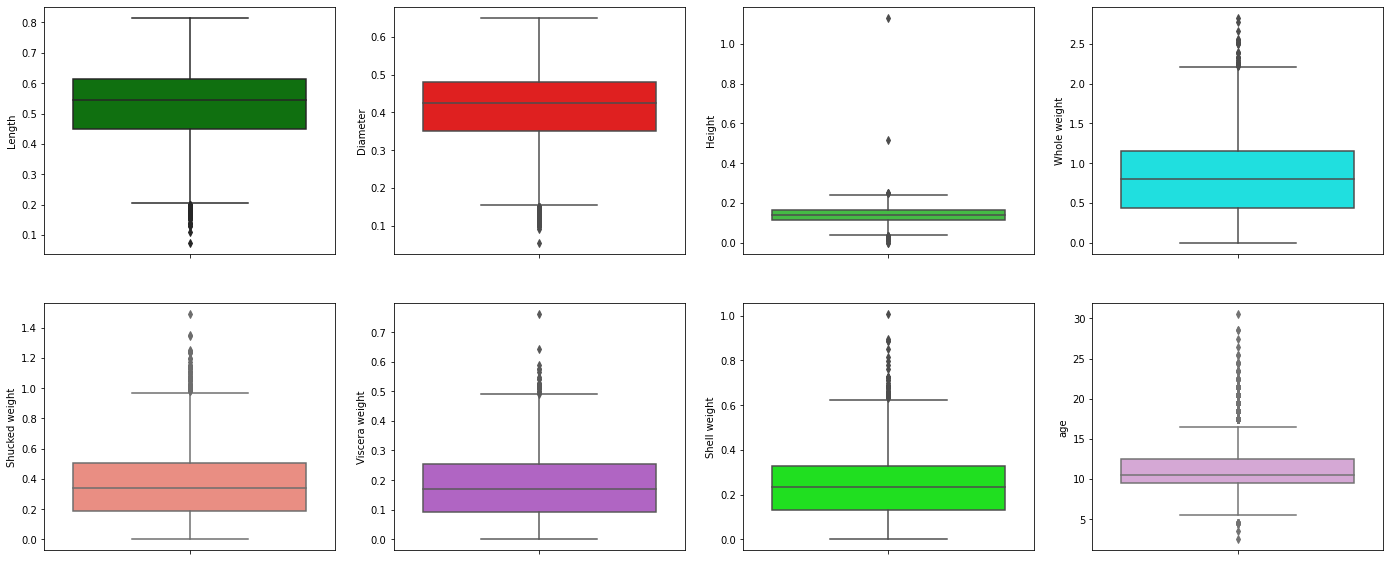

In [ ]:
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(nrows= 2, ncols = 4, figsize = (24,10))
sns.boxplot(ax = ax1, y = 'Length', data = df, color = 'green')
sns.boxplot(ax = ax2, y = 'Diameter', data = df, color = 'red')
sns.boxplot(ax = ax3, y = 'Height', data = df, color = 'limegreen')
sns.boxplot(ax = ax4, y = 'Whole weight', data = df, color = 'cyan')
sns.boxplot(ax = ax5, y = 'Shucked weight', data = df, color = 'salmon')
sns.boxplot(ax = ax6, y = 'Viscera weight', data = df, color = 'mediumorchid')
sns.boxplot(ax = ax7, y = 'Shell weight', data = df, color = 'lime')
sns.boxplot(ax = ax8, y = 'age', data = df, color = 'plum')

In [ ]:
df1 = df.copy()
df2 = df.copy()
df3 = df.copy()

df_m = df1[df1['Sex'] == 'M']
df_m.drop('Sex', axis = 1, inplace= True)
df_f = df2[df2['Sex'] == 'F']
df_f.drop('Sex', axis = 1, inplace= True)
df_i = df3[df3['Sex'] == 'I']
df_i.drop('Sex', axis = 1, inplace= True)
df_m.drop(['age'], axis=1, inplace = True)
df_f.drop(['age'], axis=1, inplace = True)
df_i.drop(['age'], axis=1, inplace = True)

df_m = df_m.mean()
df_f = df_f.mean()
df_i = df_i.mean()
trace1 = go.Bar(x = df_m.index[::-1], y = df_m.values[::-1], name = 'M', marker = dict(color = 'cyan'))
trace2 = go.Bar(x = df_f.index[::-1], y = df_f.values[::-1], name = 'F', marker = dict(color = 'violet'))
trace3 = go.Bar(x = df_i.index[::-1], y = df_i.values[::-1], name = 'I', marker = dict(color = 'lightsteelblue'))
data = [trace1, trace2, trace3]
layout = go.Layout(title = 'Feature Distribution', width = 800)
fig = go.Figure(data = data, layout= layout)
py.iplot(fig)

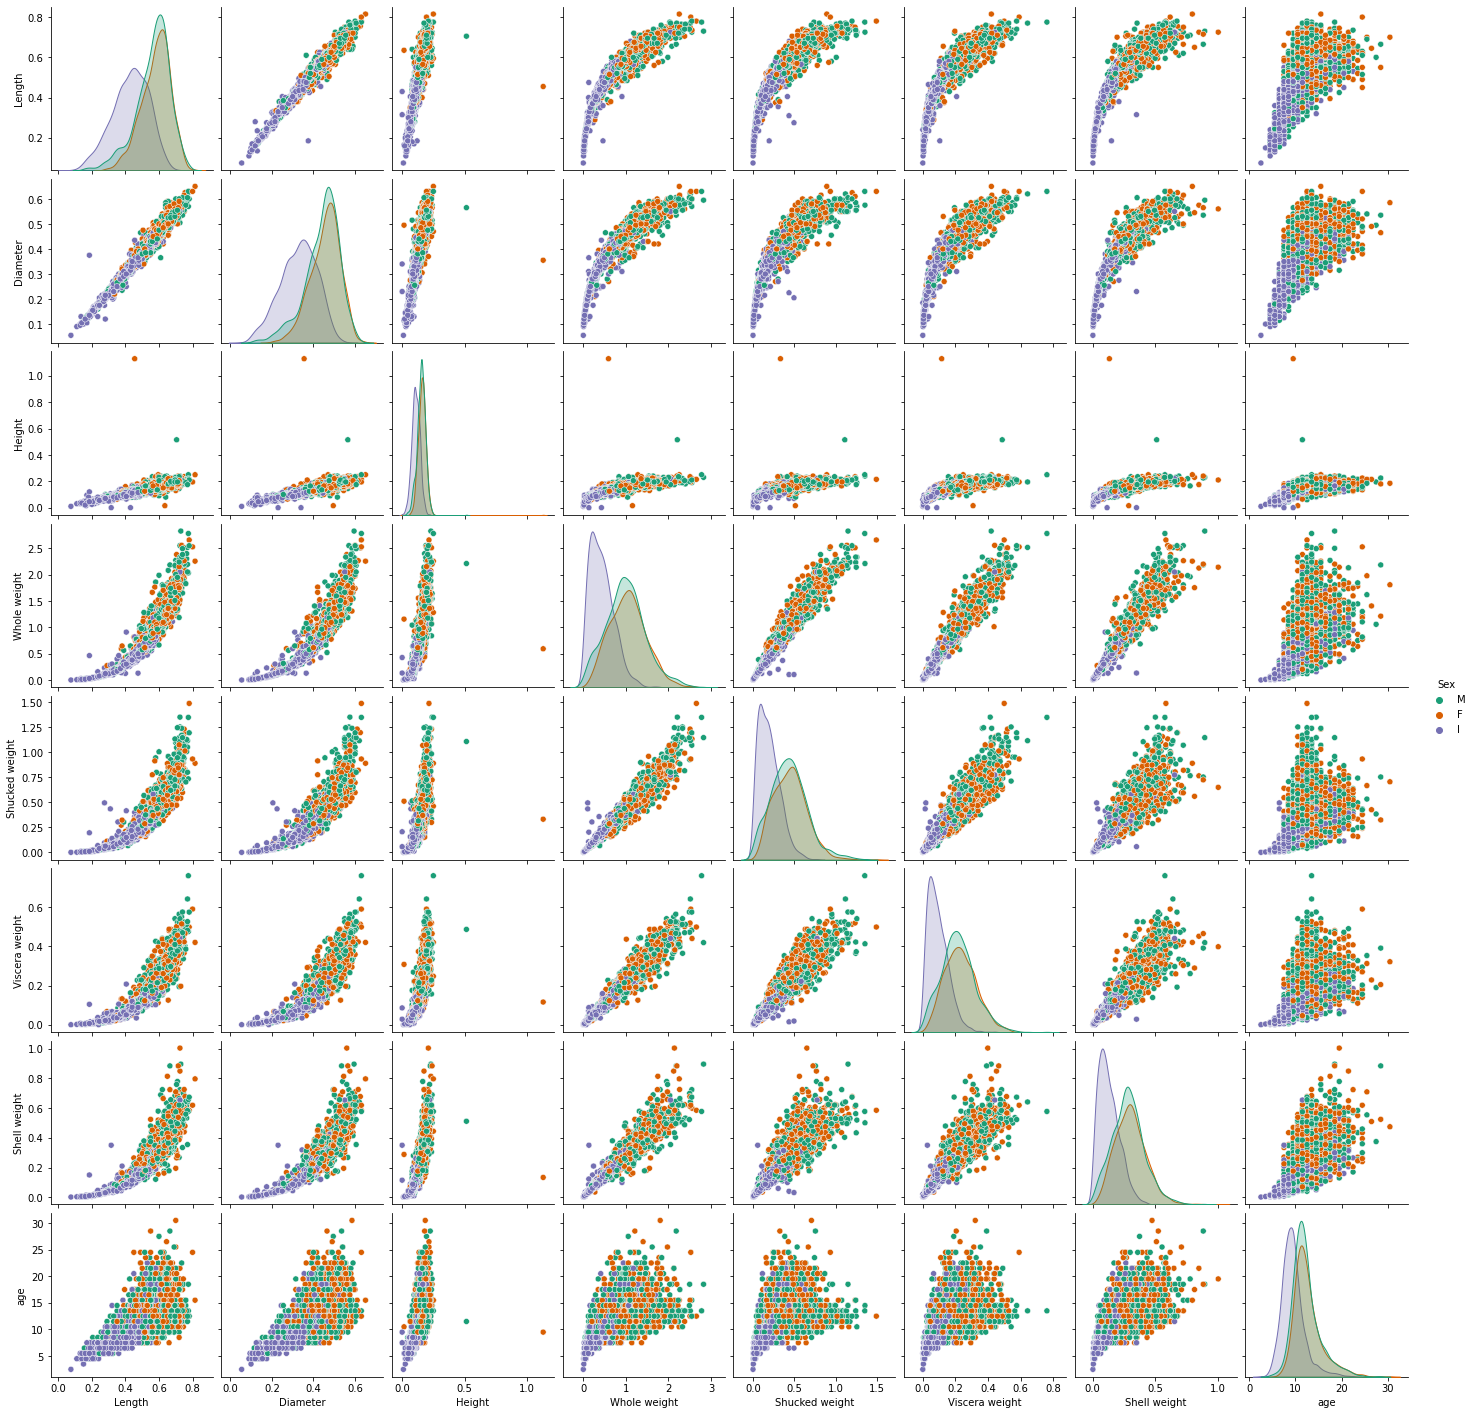

In [ ]:
sns.pairplot(data = df, hue = 'Sex', palette = 'Dark2')

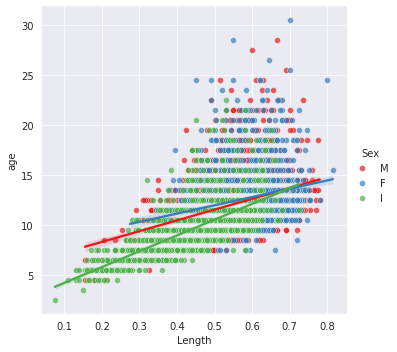

In [ ]:
sns.set_style('darkgrid')
sns.lmplot(x = 'Length', y = 'age', data = df, hue = 'Sex', palette = 'Set1', scatter_kws={'edgecolor':'white', 'alpha':0.7, 'linewidth':0.5})

In [ ]:
df.drop(df[(df['Length']<0.1) & (df['age'] < 5)].index, inplace=True)
df.drop(df[(df['Length']<0.8) & (df['age'] > 25)].index, inplace=True)
df.drop(df[(df['Length']>=0.8) & (df['age']< 25)].index, inplace=True)

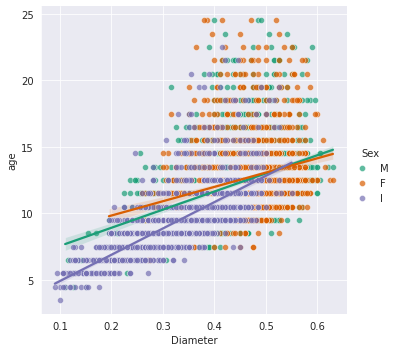

In [ ]:
sns.lmplot(x = 'Diameter', y = 'age', data = df, hue = 'Sex', palette = 'Dark2', scatter_kws={'edgecolor':'white', 'alpha':0.7, 'linewidth':0.5})

In [ ]:
df.drop(df[(df['Diameter']<0.1) & (df['age'] < 5)].index, inplace=True)
df.drop(df[(df['Diameter']<0.6) & (df['age'] > 25)].index, inplace=True)
df.drop(df[(df['Diameter']>=0.6) & (df['age']< 25)].index, inplace=True)

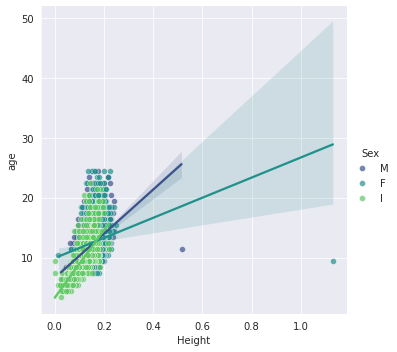

In [ ]:
sns.lmplot(x = 'Height', y = 'age', data = df, hue = 'Sex', palette = 'viridis', scatter_kws={'edgecolor':'white', 'alpha':0.7, 'linewidth':0.5})

In [ ]:
df.drop(df[(df['Height']>0.4) & (df['age'] < 15)].index, inplace=True)
df.drop(df[(df['Height']<0.4) & (df['age'] > 25)].index, inplace=True)

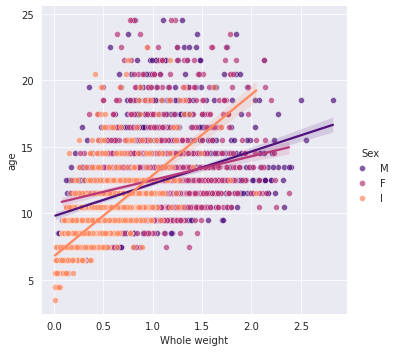

In [ ]:
sns.lmplot(x = 'Whole weight', y = 'age', data = df, hue = 'Sex', palette = 'magma', scatter_kws={'edgecolor':'white', 'alpha':0.7, 'linewidth':0.5})

In [ ]:
df.drop(df[(df['Whole weight']>= 2.5) & (df['age'] < 25)].index, inplace=True)
df.drop(df[(df['Whole weight']<2.5) & (df['age'] > 25)].index, inplace=True)

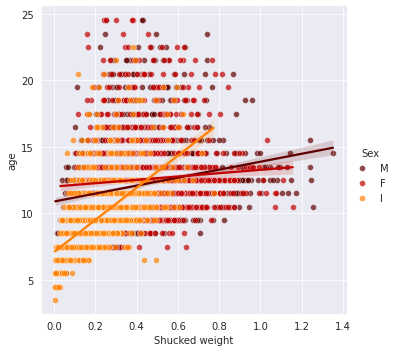

In [ ]:
sns.lmplot(x = 'Shucked weight', y = 'age', data = df, hue = 'Sex', palette = 'gist_heat', scatter_kws={'edgecolor':'white', 'alpha':0.7, 'linewidth':0.5})

In [ ]:
df.drop(df[(df['Shucked weight']>= 1) & (df['age'] < 20)].index, inplace=True)
df.drop(df[(df['Shucked weight']<1) & (df['age'] > 20)].index, inplace=True)

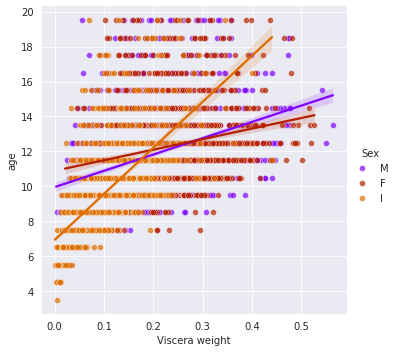

In [ ]:
sns.lmplot(x = 'Viscera weight', y = 'age', data = df, hue = 'Sex', palette = 'gnuplot', scatter_kws={'edgecolor':'white', 'alpha':0.7, 'linewidth':0.5})

In [ ]:
df.drop(df[(df['Viscera weight']> 0.5) & (df['age'] < 20)].index, inplace=True)
df.drop(df[(df['Viscera weight']<0.5) & (df['age'] > 25)].index, inplace=True)

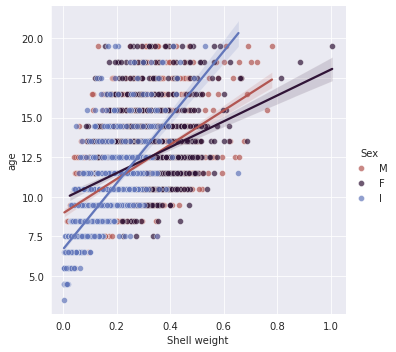

In [ ]:
sns.lmplot(x = 'Shell weight', y = 'age', data = df, hue = 'Sex', palette = 'twilight_r', scatter_kws={'edgecolor':'white', 'alpha':0.7, 'linewidth':0.5})

In [ ]:
df.drop(df[(df['Shell weight']> 0.6) & (df['age'] < 25)].index, inplace=True)
df.drop(df[(df['Shell weight']<0.8) & (df['age'] > 25)].index, inplace=True)

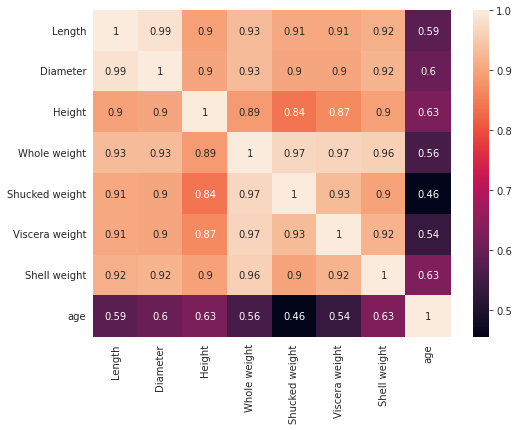

In [ ]:
plt.figure(figsize = (8,6))
corr = df.corr()
sns.heatmap(corr, annot = True)

In [ ]:
df.drop('Sex', axis = 1, inplace = True)
df.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


In [ ]:
df['age'].value_counts()

10.5    686
11.5    622
9.5     567
12.5    469
8.5     391
7.5     259
13.5    247
14.5    197
15.5    118
6.5     115
16.5    102
17.5     61
5.5      57
18.5     51
19.5     38
4.5      14
3.5       1
Name: age, dtype: int64

In [ ]:
df['age'].mean()

11.127284105131414

In [ ]:
df_1 = df.copy()

In [ ]:
Age = []
for i in df_1['age']:
    if i > 11.12:
        Age.append('1')
    else:
        Age.append('0')
df_1['Age'] = Age
df_1.drop('age', axis = 1, inplace = True)
df_1.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,0
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,0


In [ ]:
df_1['Age'].value_counts()

0    2090
1    1905
Name: Age, dtype: int64

In [ ]:
X = df_1.drop('Age', axis = 1).values
y = df_1['Age'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print('Classification Report: \n', classification_report(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
lr_train_acc = lr.score(X_train, y_train)
print('Training Score: ', lr_train_acc)
lr_test_acc = lr.score(X_test, y_test)
print('Testing Score: ', lr_test_acc)

Classification Report: 
               precision    recall  f1-score   support

           0       0.75      0.81      0.78       611
           1       0.78      0.72      0.75       588

    accuracy                           0.76      1199
   macro avg       0.76      0.76      0.76      1199
weighted avg       0.76      0.76      0.76      1199

Confusion Matrix: 
 [[494 117]
 [167 421]]
Training Score:  0.7832618025751072
Testing Score:  0.7631359466221852


In [ ]:
svc = SVC(C = 1, gamma= 1)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

print('Classification Report: \n', classification_report(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
svc_train_acc = svc.score(X_train, y_train) 
print('Training Score: ', svc_train_acc)
svc_test_acc = svc.score(X_test, y_test)
print('Testing Score: ', svc_test_acc)

Classification Report: 
               precision    recall  f1-score   support

           0       0.79      0.78      0.78       611
           1       0.77      0.78      0.78       588

    accuracy                           0.78      1199
   macro avg       0.78      0.78      0.78      1199
weighted avg       0.78      0.78      0.78      1199

Confusion Matrix: 
 [[477 134]
 [130 458]]
Training Score:  0.8029327610872675
Testing Score:  0.7798165137614679


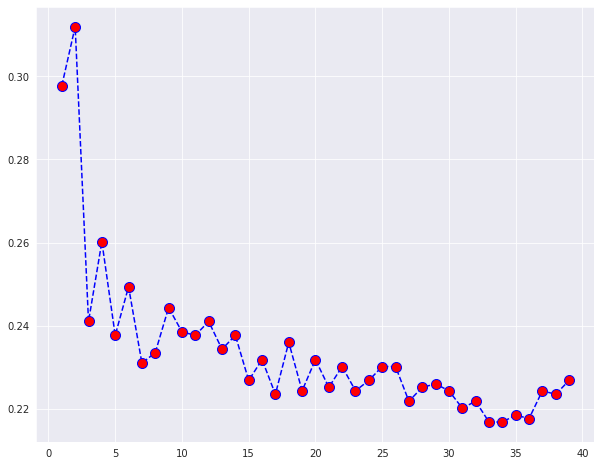

In [ ]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors= i)
    knn.fit(X_train, y_train)
    y_predi = knn.predict(X_test)
    error_rate.append(np.mean(y_test != y_predi))
    
plt.figure(figsize = (10,8))
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)

In [ ]:
knn = KNeighborsClassifier(n_neighbors= 31)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print('Classification Report: \n', classification_report(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
knn_train_acc = knn.score(X_train, y_train) 
print('Training Score: ', knn_train_acc)
knn_test_acc = knn.score(X_test, y_test)
print('Testing Score: ', knn_test_acc)

Classification Report: 
               precision    recall  f1-score   support

           0       0.78      0.79      0.78       611
           1       0.78      0.77      0.78       588

    accuracy                           0.78      1199
   macro avg       0.78      0.78      0.78      1199
weighted avg       0.78      0.78      0.78      1199

Confusion Matrix: 
 [[480 131]
 [133 455]]
Training Score:  0.7896995708154506
Testing Score:  0.7798165137614679


In [ ]:
dt = DecisionTreeClassifier(max_depth = 5)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

print('Classification Report: \n', classification_report(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
dt_train_acc = dt.score(X_train, y_train) 
print('Training Score: ', dt_train_acc)
dt_test_acc = dt.score(X_test, y_test)
print('Testing Score: ', dt_test_acc)

Classification Report: 
               precision    recall  f1-score   support

           0       0.78      0.75      0.76       611
           1       0.75      0.78      0.77       588

    accuracy                           0.76      1199
   macro avg       0.77      0.77      0.76      1199
weighted avg       0.77      0.76      0.76      1199

Confusion Matrix: 
 [[457 154]
 [128 460]]
Training Score:  0.796137339055794
Testing Score:  0.7648040033361134


In [ ]:
rf = RandomForestClassifier(n_estimators= 150, max_depth= 5)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print('Classification Report: \n', classification_report(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
rf_train_acc = rf.score(X_train, y_train) 
print('Training Score: ', rf_train_acc)
rf_test_acc = rf.score(X_test, y_test)
print('Testing Score: ', rf_test_acc)

Classification Report: 
               precision    recall  f1-score   support

           0       0.78      0.77      0.77       611
           1       0.76      0.77      0.77       588

    accuracy                           0.77      1199
   macro avg       0.77      0.77      0.77      1199
weighted avg       0.77      0.77      0.77      1199

Confusion Matrix: 
 [[470 141]
 [136 452]]
Training Score:  0.804005722460658
Testing Score:  0.7689741451209341


In [ ]:
adb = AdaBoostClassifier(n_estimators= 100)
adb.fit(X_train, y_train)
y_pred = adb.predict(X_test)

print('Classification Report: \n', classification_report(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
adb_train_acc = adb.score(X_train, y_train) 
print('Training Score: ', adb_train_acc)
adb_test_acc = adb.score(X_test, y_test)
print('Testing Score: ', adb_test_acc)

Classification Report: 
               precision    recall  f1-score   support

           0       0.76      0.76      0.76       611
           1       0.75      0.75      0.75       588

    accuracy                           0.76      1199
   macro avg       0.76      0.76      0.76      1199
weighted avg       0.76      0.76      0.76      1199

Confusion Matrix: 
 [[466 145]
 [148 440]]
Training Score:  0.8004291845493562
Testing Score:  0.755629691409508


In [ ]:
gdb = GradientBoostingClassifier(n_estimators= 200, max_depth = 2, min_samples_leaf= 2)
gdb.fit(X_train, y_train)
y_pred = gdb.predict(X_test)

print('Classification Report: \n', classification_report(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
gdb_train_acc = gdb.score(X_train, y_train) 
print('Training Score: ', gdb_train_acc)
gdb_test_acc = gdb.score(X_test, y_test)
print('Testing Score: ', gdb_test_acc)

Classification Report: 
               precision    recall  f1-score   support

           0       0.78      0.80      0.79       611
           1       0.79      0.77      0.78       588

    accuracy                           0.78      1199
   macro avg       0.78      0.78      0.78      1199
weighted avg       0.78      0.78      0.78      1199

Confusion Matrix: 
 [[490 121]
 [138 450]]
Training Score:  0.8193848354792561
Testing Score:  0.7839866555462885


In [ ]:
xgb = XGBClassifier(objective = "binary:logistic", n_estimators = 100, max_depth = 3, subsample = 0.8, colsample_bytree = 0.6, learning_rate = 0.1)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

print('Classification Report: \n', classification_report(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
xgb_train_acc = xgb.score(X_train, y_train) 
print('Training Score: ', xgb_train_acc)
xgb_test_acc = xgb.score(X_test, y_test)
print('Testing Score: ', xgb_test_acc)

Classification Report: 
               precision    recall  f1-score   support

           0       0.79      0.79      0.79       611
           1       0.78      0.78      0.78       588

    accuracy                           0.78      1199
   macro avg       0.78      0.78      0.78      1199
weighted avg       0.78      0.78      0.78      1199

Confusion Matrix: 
 [[484 127]
 [131 457]]
Training Score:  0.8183118741058655
Testing Score:  0.7848206839032527


In [ ]:
x = ['Logistic Regression','SVC', 'KNN', 'Decision Tree','Random Forest','AdaBoost','Gradient Boosting','XGBoost']
y1 = [lr_train_acc, svc_train_acc, knn_train_acc, dt_train_acc, rf_train_acc, adb_train_acc, gdb_train_acc, xgb_train_acc]
y2 = [lr_test_acc, svc_test_acc, knn_test_acc, dt_test_acc, rf_test_acc, adb_test_acc, gdb_test_acc, xgb_test_acc]

trace1 = go.Bar(x = x, y = y1, name = 'Training Accuracy', marker = dict(color = 'cyan'))
trace2 = go.Bar(x = x, y = y2, name = 'Testing Accuracy', marker = dict(color = 'violet'))
data = [trace1,trace2]
layout = go.Layout(title = 'Accuracy Plot', width = 750)
fig = go.Figure(data = data, layout = layout)
py.iplot(fig)